In [72]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy.stats as scp
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
PATH = "./crunchbase_filtered_data.csv"                    # Crunchbase data filtered by A-named companies
dataset = pd.read_csv(PATH)
# dataset

In [207]:
funding_df = dataset[dataset["raised_amount_usd"] < 150000000]["raised_amount_usd"]    # Omitting outliers (less than 5% of impact on data body)
funding_df.describe()

count    4.830000e+02
mean     9.084519e+06
std      1.583734e+07
min      5.000000e+03
25%      1.100000e+06
50%      3.000000e+06
75%      1.000000e+07
max      1.120000e+08
Name: raised_amount_usd, dtype: float64

In [212]:
""" FUNCTION TO DERIVE MEAN FROM RANDOM DATA SUBSAMPLE (SIZE: n) """
def get_sample(dataset, n=50):
    sample_dataset = np.empty((0, n))
    
    for _ in range(0, n):
        # random_selection = (dataset.max() - dataset.min()) * np.random.random_sample() + dataset.min()
        random_selection = np.random.choice(dataset, n, replace=True)
        sample_dataset = np.append(sample_dataset, random_selection)
        
    # return np.random.choice(dataset, n, replace=True) / n    
    return (np.sum(sample_dataset) / n)

""" FUNCTION TO CREATE DISTRIBUTION (SIZE: s) OF MEANS FROM SAMPLE MEANS (SIZE: n) """
def create_sample_distribution(dataset, NUM_ITER=1000, n=30):
    # NOTE: Modified to take third argument as subsample size for get_sample() method
    distribution_of_sample_means = np.empty((0, NUM_ITER))
    
    for _ in range(0, NUM_ITER):
        sample_mean = get_sample(dataset, n)
        distribution_of_sample_means = np.append(distribution_of_sample_means, sample_mean)
        
    return distribution_of_sample_means

In [213]:
# This isn't necessary to answer the question; only useful for visualization!
funding_within_select_range_df = funding_df[(funding_df >= 25000000) & (funding_df <= 30000000)]    # Returns [$2.5M, $3.0M]
# funding_within_select_range_df

(array([ 375.,   40.,   46.,    6.,    7.,    3.,    0.,    0.,    0.,    6.]),
 array([  5.00000000e+03,   1.12045000e+07,   2.24040000e+07,
          3.36035000e+07,   4.48030000e+07,   5.60025000e+07,
          6.72020000e+07,   7.84015000e+07,   8.96010000e+07,
          1.00800500e+08,   1.12000000e+08]),
 <a list of 10 Patch objects>)

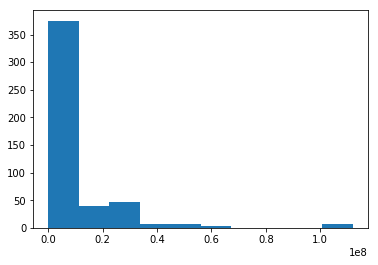

In [214]:
plt.hist(funding_df)

In [215]:
sample_distribution = create_sample_distribution(funding_df)
# sample_distribution

(array([   3.,   10.,   53.,  134.,  249.,  246.,  193.,   72.,   34.,    6.]),
 array([  2.17311556e+08,   2.27953934e+08,   2.38596312e+08,
          2.49238690e+08,   2.59881068e+08,   2.70523446e+08,
          2.81165824e+08,   2.91808202e+08,   3.02450580e+08,
          3.13092958e+08,   3.23735336e+08]),
 <a list of 10 Patch objects>)

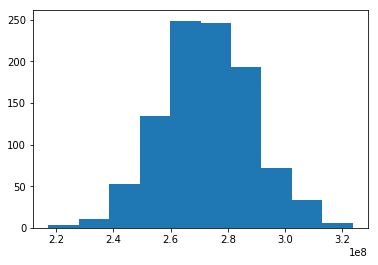

In [216]:
plt.hist(sample_distribution)

In [217]:
X1 = 25000000; X2 = 30000000

mean = np.mean(sample_distribution)
std = np.std(sample_distribution)

Z1 = (X1 - mean) / std; Z2 = (X2 - mean) / std
Z1
# prob1 = scp.norm.cdf(Z1); prob2 = scp.norm.cdf(Z2)
# prob2 - prob1

-15.637358173735699